## <font color = 'darkblue'>Problem Statement :</font>
- `For the given clinical paraneters about a patient, can we predict weather or not they have heart disease?`

In [1]:
# Importing Libraries

In [2]:
!pip install lightgbm


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_heart = pd.read_csv('C:/Users/shaik/OneDrive/Desktop/heart_2020_cleaned.csv')
df_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
df_heart.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


##  <font color = 'darkblue'>2 <span style='color:#0386f7de'>|</span> About the Dataset <a id="prep"></a></font>

### <font color = 'royalblue'>2.1 <span style='color:#0386f7de'>|</span> Shape of the Dataset <a id="prep_null"></a></font>

In [129]:
rows = df_heart.shape[0]
columns = df_heart.shape[1]
print("So for the given dataset we have dimentions as \nRows : {} \nColumns : {}".format(rows, columns))

So for the given dataset we have dimentions as 
Rows : 301717 
Columns : 18


### <font color = 'royalblue'>2.2 <span style='color:#0386f7de'>|</span> Datatypes of each features <a id="prep_null"></a></font>

In [7]:
df_heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### <font color = 'royalblue'>2.3 <span style='color:#0386f7de'>|</span> Column Descriptions</font>
- `HeartDisease`: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
- `BMI`: Body Mass Index (BMI).
- `Smoking`: Have you smoked at least 100 cigarettes in your entire life?
- `AlcoholDrinking`: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- `Stroke`: (Ever told) (you had) a stroke?
- `PhysicalHealth`: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- `MentalHealth`: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- `DiffWalking`: Do you have serious difficulty walking or climbing stairs?
- `Sex`: Are you male or female?
- `AgeCategory`: Fourteen-level age category. (then calculated the mean)
- `Race`: Imputed race/ethnicity value.
- `Diabetic`: (Ever told) (you had) diabetes?
- `PhysicalActivity`: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- `GenHealth`: Would you say that in general your health is...
- `SleepTime`: On average, how many hours of sleep do you get in a 24-hour period?
- `Asthma`: (Ever told) (you had) asthma?
- `KidneyDisease`: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- `SkinCancer`: (Ever told) (you had) skin cancer?

### <font color = 'royalblue'>2.4 <span style='color:#0386f7de'>|</span> Check for <I>NULL</I> values</font>

In [8]:
print('\n--- NULL count ---\n{}'.format(df_heart.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs or treat null values as instructed


--- NULL count ---
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


### <font color = 'royalblue'>2.5 <span style='color:#0386f7de'>|</span> Check for <I>Duplicates</I></font>

In [9]:
duplicates = df_heart[df_heart.duplicated()]

In [10]:
duplicates_sum = df_heart.duplicated().sum()
print('\n1st DUPLICATE count:\t{}'.format(duplicates_sum))


1st DUPLICATE count:	18078


In [11]:
N=0
Y=0
for i in duplicates['HeartDisease']:
    if i == 'No':
        N += 1
    else:
        Y += 1
print('Duplicate data of patients with Heat Disease :', Y)
print('Duplicate data of patients with No Heart Disease :', N)

Duplicate data of patients with Heat Disease : 112
Duplicate data of patients with No Heart Disease : 17966


- Cleaning up the NULL and duplicate values in the dataset.

In [12]:
df_heart = df_heart.drop_duplicates()
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [13]:
df_heart.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
BMI,301717.000000,28.441970,6.468134,12.020000,24.030000,27.410000,31.650000,94.850000
PhysicalHealth,301717.000000,3.572298,8.140656,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,301717.000000,4.121475,8.128288,0.000000,0.000000,0.000000,4.000000,30.000000
SleepTime,301717.000000,7.084559,1.467122,1.000000,6.000000,7.000000,8.000000,24.000000


In [14]:
df_heart.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,257362,159671,31670,227724,251796,230412,104796,259066,289941,272425


In [15]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     301717 

In [16]:
df_heart.max()

HeartDisease                           Yes
BMI                                  94.85
Smoking                                Yes
AlcoholDrinking                        Yes
Stroke                                 Yes
PhysicalHealth                        30.0
MentalHealth                          30.0
DiffWalking                            Yes
Sex                                   Male
AgeCategory                    80 or older
Race                                 White
Diabetic            Yes (during pregnancy)
PhysicalActivity                       Yes
GenHealth                        Very good
SleepTime                             24.0
Asthma                                 Yes
KidneyDisease                          Yes
SkinCancer                             Yes
dtype: object

### <font color = 'royalblue'>2.7 <span style='color:#0386f7de'>|</span> About Features <a id="prep_null"></a></font>


In [17]:
columns = df_heart.columns
columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

### <font color = 'cornflowerblue'>2.7.1 <span style='color:#0386f7de'>|</span> Univariate Analysis <a id="prep_null"></a></font>


In [18]:
colours = ['cornflowerblue', 'royalblue','blue','mediumblue', 'darkblue', 'midnightblue', 'navy']
rainbowcolours =['purple', 'indigo', 'blue', 'green', 'yellow', 'orangered', 'red'] 
colours1 =['greenyellow','mediumaquamarine','turquoise','mediumturquoise','darkturquoise']

<Axes: xlabel='HeartDisease', ylabel='count'>

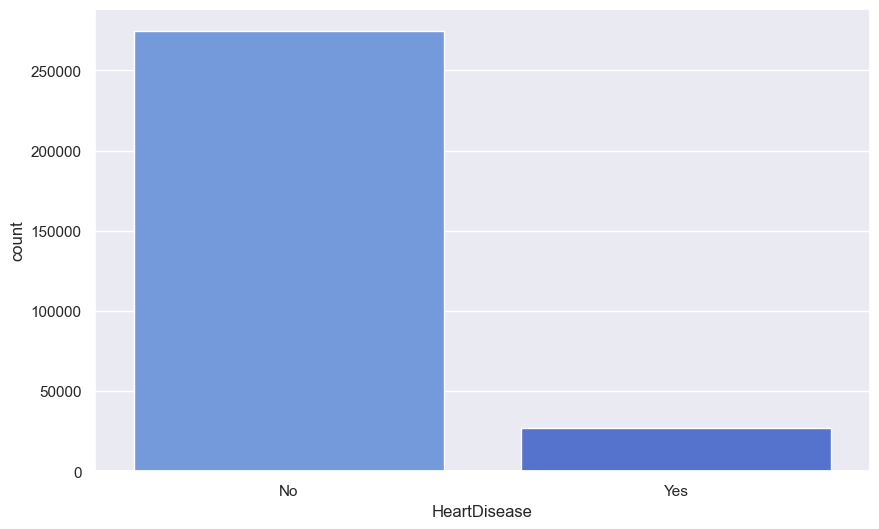

In [19]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x='HeartDisease', y=None, data=df_heart, order=['No', 'Yes'], palette=colours)


In [20]:
sns.set(rc = {'figure.figsize':(15,8)})

In [21]:
pd.crosstab(df_heart['Smoking'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Smoking,,,
No,163028,11284,174312
Yes,111428,15977,127405
All,274456,27261,301717


In [22]:
pd.crosstab(df_heart['AlcoholDrinking'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
AlcoholDrinking,,,
No,254016,26120,280136
Yes,20440,1141,21581
All,274456,27261,301717


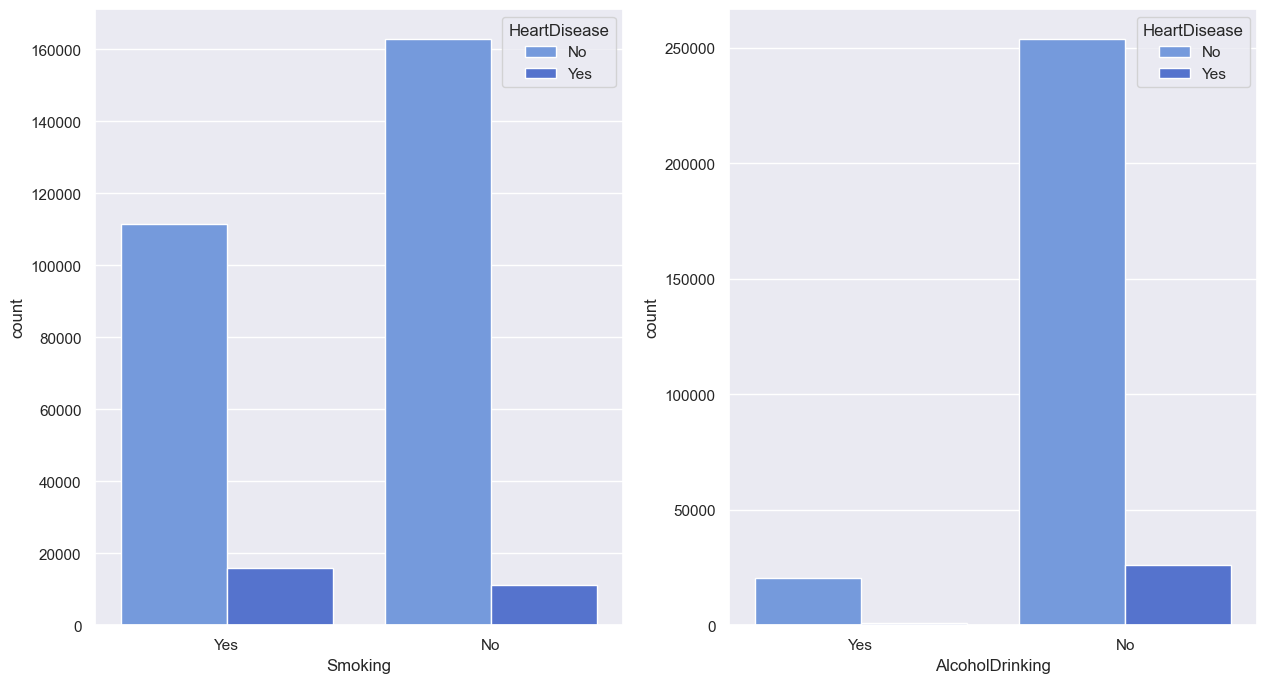

In [23]:
f, axes = plt.subplots(1,2)
sns.countplot(x='Smoking',hue='HeartDisease',data=df_heart,order=['Yes','No'], ax = axes[0],palette=colours)
sns.countplot(x='AlcoholDrinking',hue='HeartDisease',data=df_heart,order=['Yes','No'], ax = axes[1], palette=colours)
plt.show()

In [24]:
pd.crosstab(df_heart['Stroke'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Stroke,,,
No,266781,22872,289653
Yes,7675,4389,12064
All,274456,27261,301717


In [25]:
pd.crosstab(df_heart['DiffWalking'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
DiffWalking,,,
No,240125,17237,257362
Yes,34331,10024,44355
All,274456,27261,301717


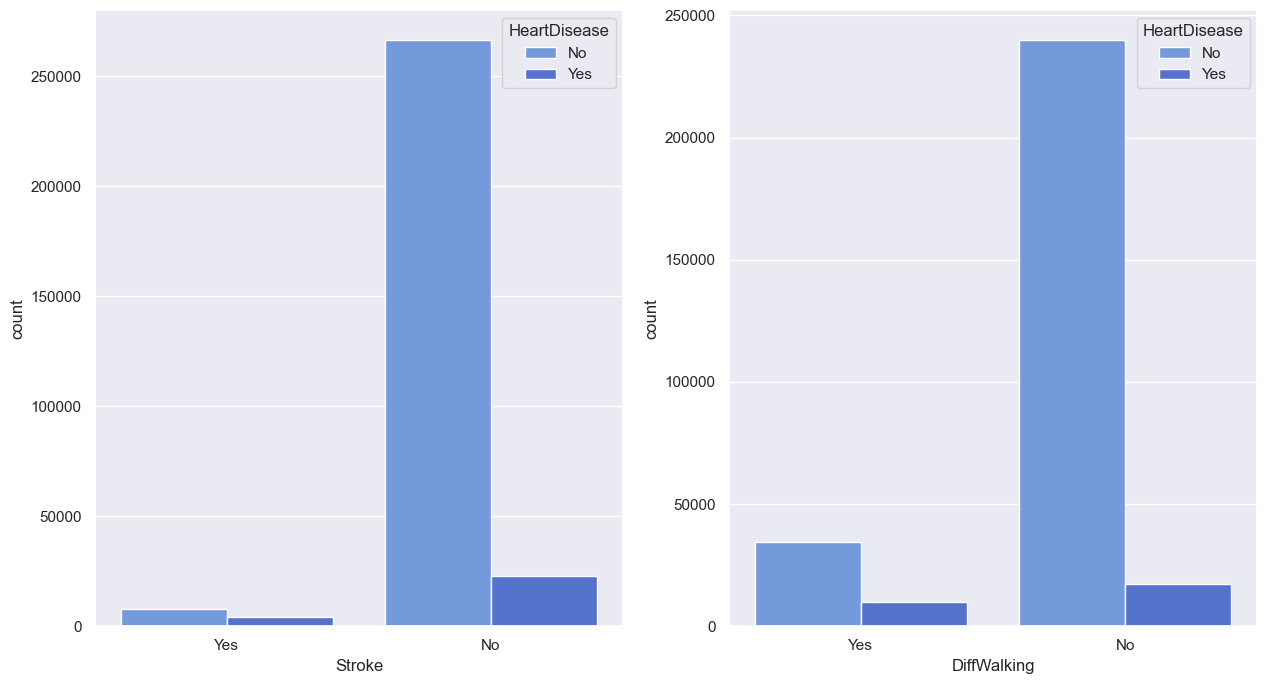

In [26]:
f, axes = plt.subplots(1,2)
sns.countplot(x='Stroke',hue='HeartDisease',data=df_heart,order=['Yes','No'], ax = axes[0],palette = colours)
sns.countplot(x='DiffWalking',hue='HeartDisease',data=df_heart,order=['Yes','No'], ax = axes[1], palette = colours)
plt.show()

In [27]:
pd.crosstab(df_heart['Sex'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Sex,,,
Female,148458,11213,159671
Male,125998,16048,142046
All,274456,27261,301717


In [28]:
pd.crosstab(df_heart['PhysicalActivity'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
PhysicalActivity,,,
No,61423,9882,71305
Yes,213033,17379,230412
All,274456,27261,301717


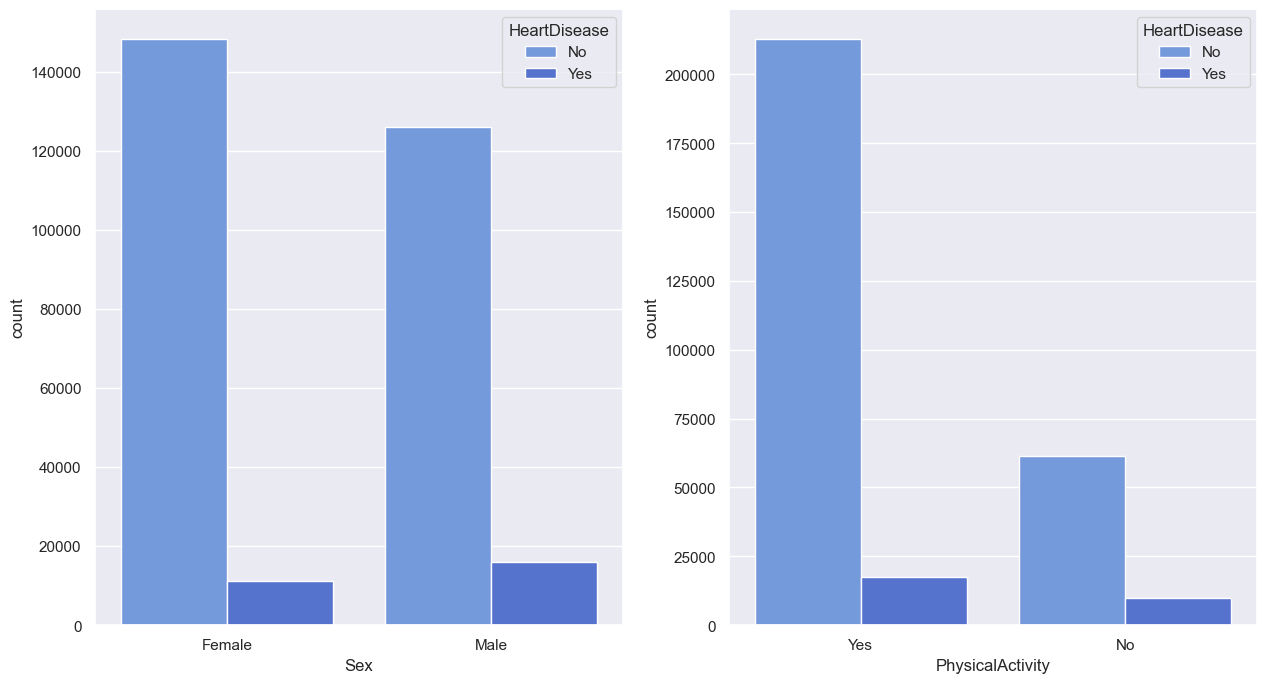

In [29]:
f, axes = plt.subplots(1,2)
sns.countplot(x='Sex',y=None,data=df_heart,hue = 'HeartDisease',order=['Female','Male'], palette=colours,ax = axes[0])
sns.countplot(x='PhysicalActivity',y=None,data=df_heart,hue = 'HeartDisease',order=['Yes', 'No'], palette=colours,ax = axes[1])
plt.show()

In [30]:
pd.crosstab(df_heart['Asthma'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Asthma,,,
No,236737,22329,259066
Yes,37719,4932,42651
All,274456,27261,301717


In [31]:
pd.crosstab(df_heart['KidneyDisease'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
KidneyDisease,,,
No,266134,23807,289941
Yes,8322,3454,11776
All,274456,27261,301717


In [32]:
pd.crosstab(df_heart['SkinCancer'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
SkinCancer,,,
No,250132,22293,272425
Yes,24324,4968,29292
All,274456,27261,301717


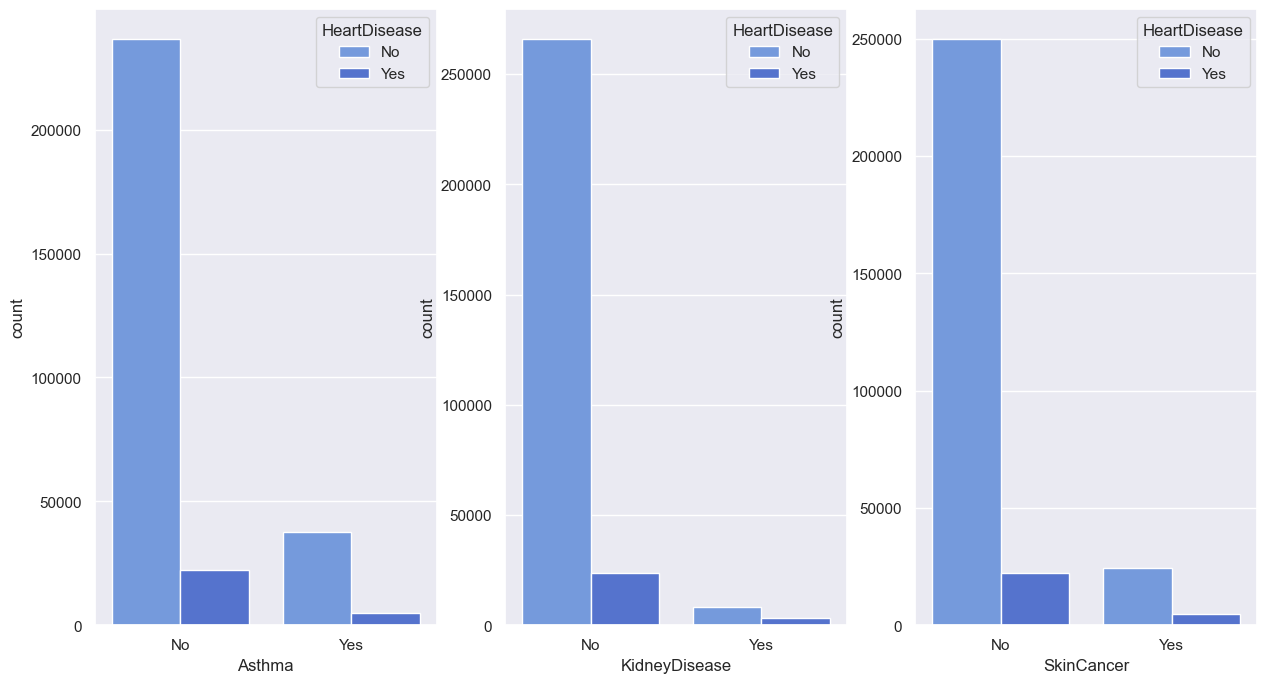

In [33]:
f, axes = plt.subplots(1,3)
sns.countplot(x='Asthma',y=None,hue='HeartDisease',data=df_heart,order=['No', 'Yes'], palette=colours,ax=axes[0])
sns.countplot(x='KidneyDisease',y=None,hue='HeartDisease',data=df_heart,order=['No', 'Yes'], palette=colours,ax=axes[1])
sns.countplot(x='SkinCancer',y=None,hue='HeartDisease',data=df_heart,order=['No', 'Yes'], palette=colours,ax=axes[2])
plt.show()

In [34]:
pd.crosstab(df_heart['Diabetic'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Diabetic,,,
No,234380,17416,251796
"No, borderline diabetes",5987,789,6776
Yes,31641,8948,40589
Yes (during pregnancy),2448,108,2556
All,274456,27261,301717


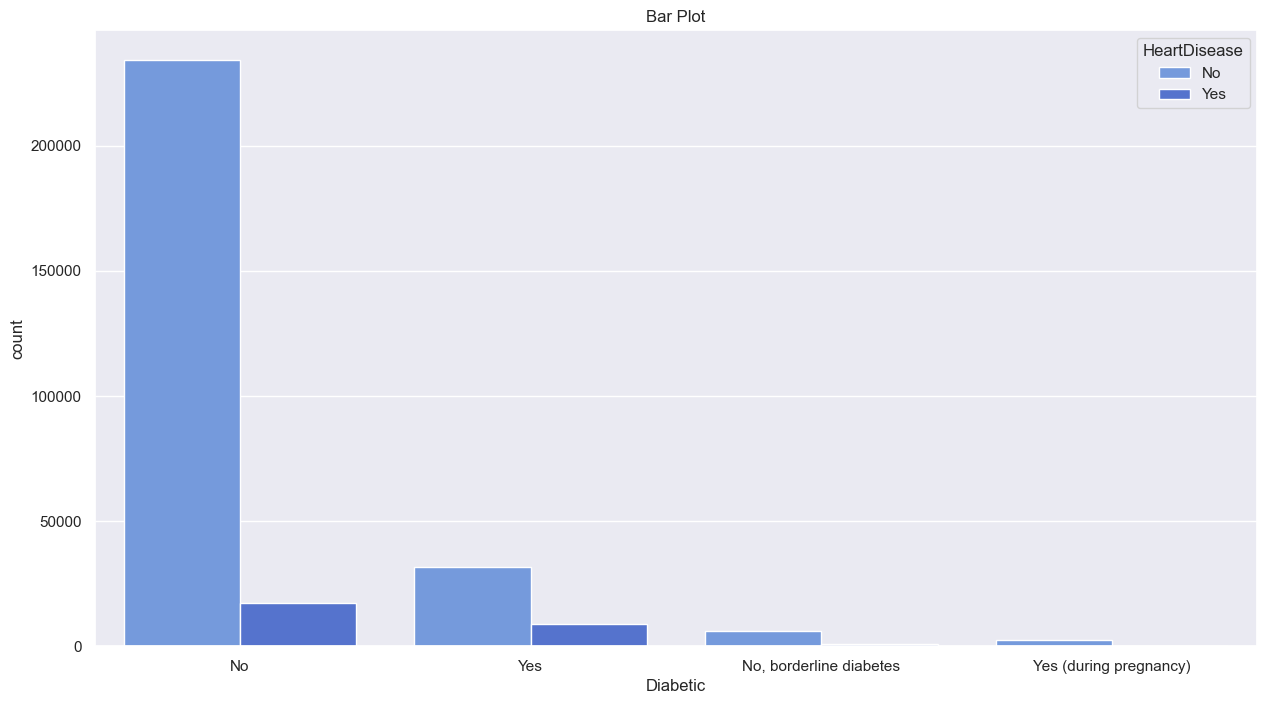

In [35]:
sns.countplot(x='Diabetic',y=None,hue='HeartDisease',data=df_heart,order=['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'], palette=colours)
plt.title("Bar Plot")
plt.show()

In [36]:
pd.crosstab(df_heart['Race'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
Race,,,
American Indian/Alaskan Native,4650,542,5192
Asian,7727,266,7993
Black,21081,1729,22810
Hispanic,25664,1443,27107
Other,10005,886,10891
White,205329,22395,227724
All,274456,27261,301717


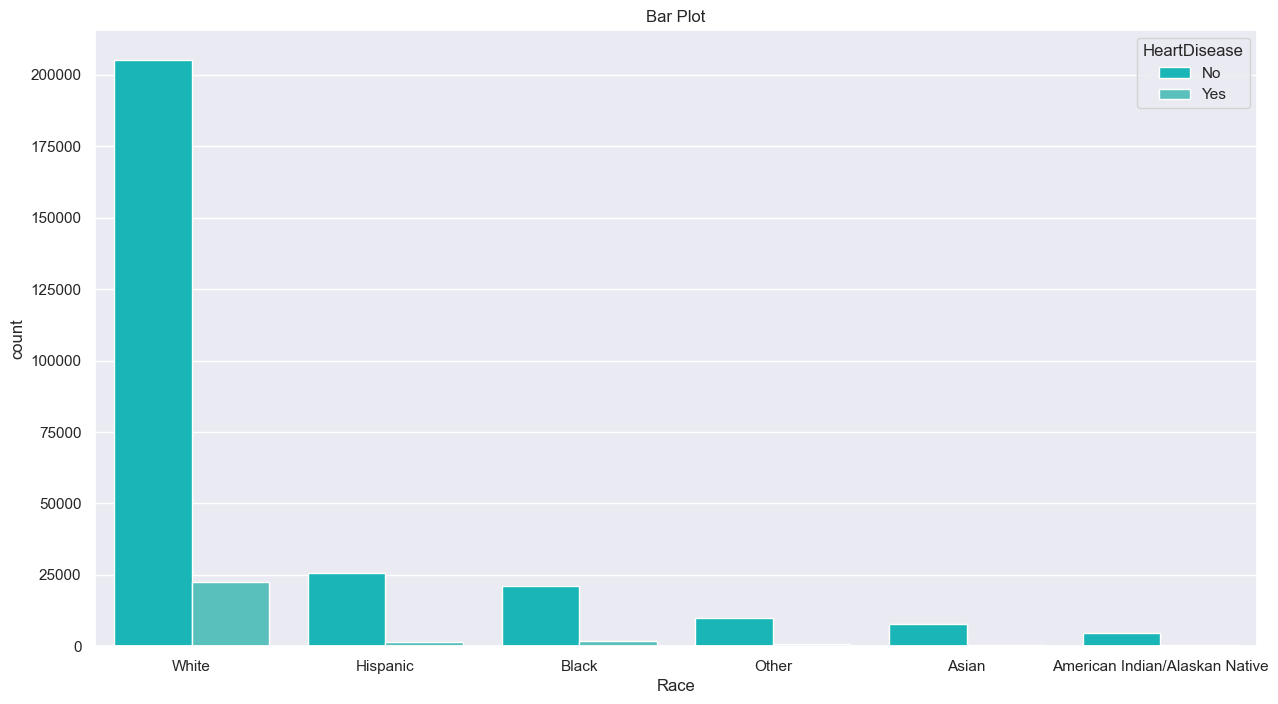

In [37]:
sns.countplot(x='Race',y=None,hue='HeartDisease',data=df_heart,order=['White','Hispanic','Black','Other','Asian','American Indian/Alaskan Native'], palette=colours1[::-1])
plt.title("Bar Plot")
plt.show()

In [38]:
pd.crosstab(df_heart['GenHealth'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
GenHealth,,,
Excellent,58242,1495,59737
Fair,27576,7083,34659
Good,81734,9505,91239
Poor,7436,3850,11286
Very good,99468,5328,104796
All,274456,27261,301717


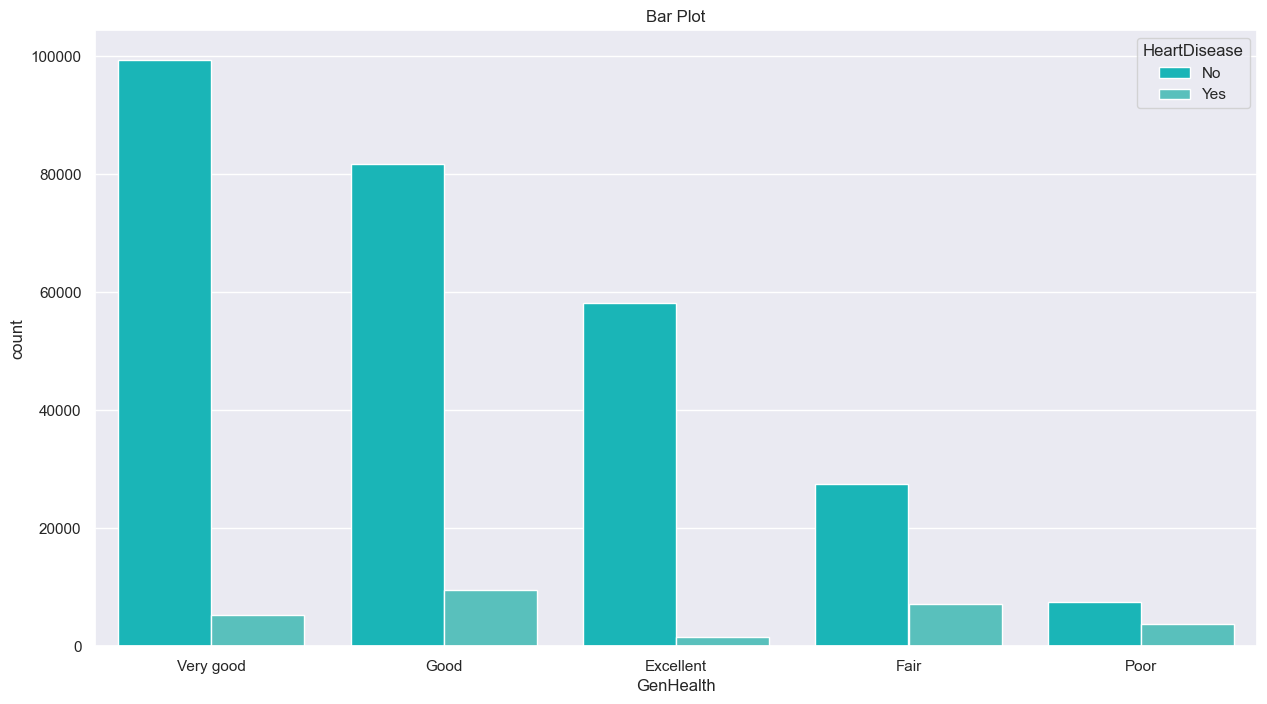

In [39]:
sns.countplot(x='GenHealth',y=None,data=df_heart,order=['Very good', 'Good', 'Excellent', 'Fair', 'Poor'],hue='HeartDisease', palette=colours1[::-1])
plt.title("Bar Plot")
plt.show()

In [40]:
print(pd.value_counts(df_heart['AgeCategory'],ascending=True))

print('\nThere are {} unique values in AgeCategory Feature.'.format(df_heart['AgeCategory'].nunique()))

AgeCategory
25-29          16312
30-34          17953
35-39          19526
40-44          19837
18-24          19998
45-49          20518
75-79          20713
80 or older    23352
50-54          23736
55-59          27610
70-74          29273
60-64          31219
65-69          31670
Name: count, dtype: int64

There are 13 unique values in AgeCategory Feature.


In [41]:
pd.crosstab(df_heart['AgeCategory'],df_heart['HeartDisease'],margins=True)

HeartDisease,No,Yes,All
AgeCategory,,,
18-24,19868,130,19998
25-29,16179,133,16312
30-34,17727,226,17953
35-39,19230,296,19526
40-44,19351,486,19837
45-49,19775,743,20518
50-54,22353,1383,23736
55-59,25411,2199,27610
60-64,27898,3321,31219


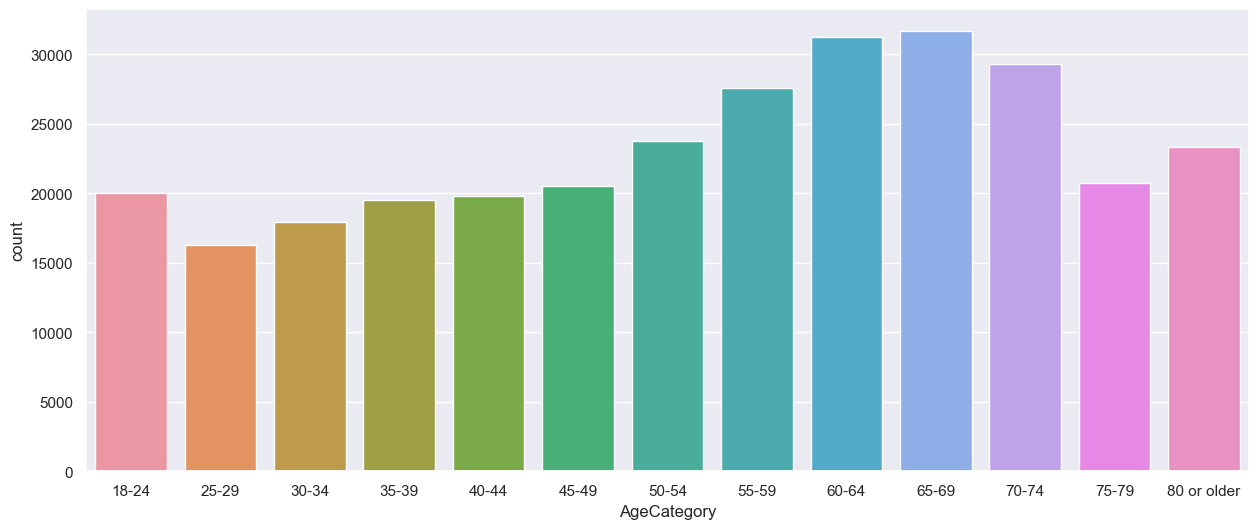

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x='AgeCategory',y=None,data=df_heart,order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'])
plt.show()

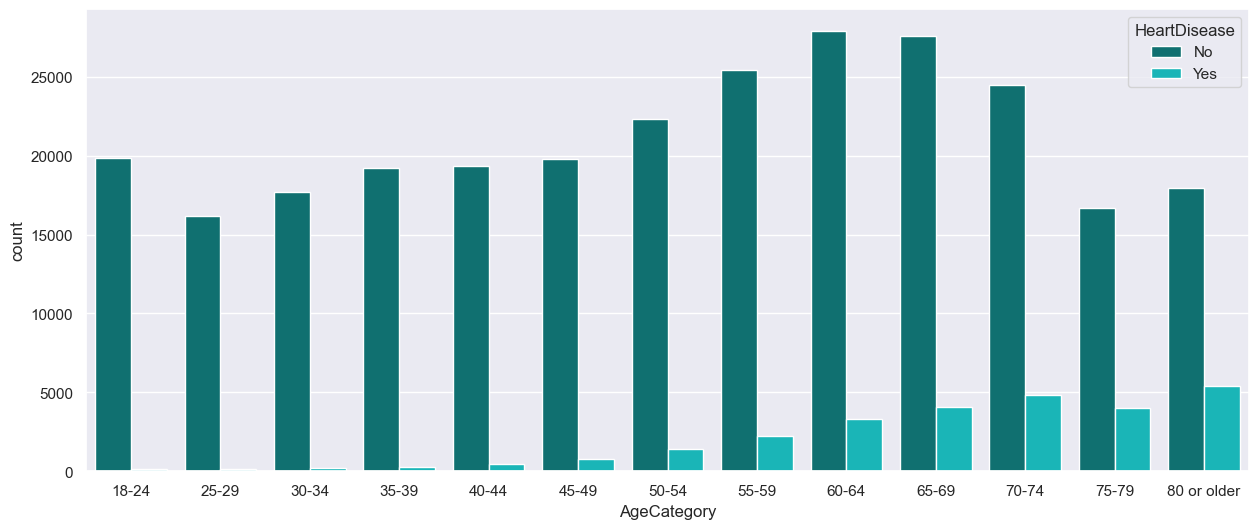

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x='AgeCategory',hue='HeartDisease',data=df_heart,order=['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],palette = ['teal','darkturquoise'])
plt.show()

### <font color = 'royalblue'>2.8 <span style='color:#0386f7de'>|</span> Distribution of Input Variables <a id="prep_null"></a></font>


In [44]:
df_heart.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

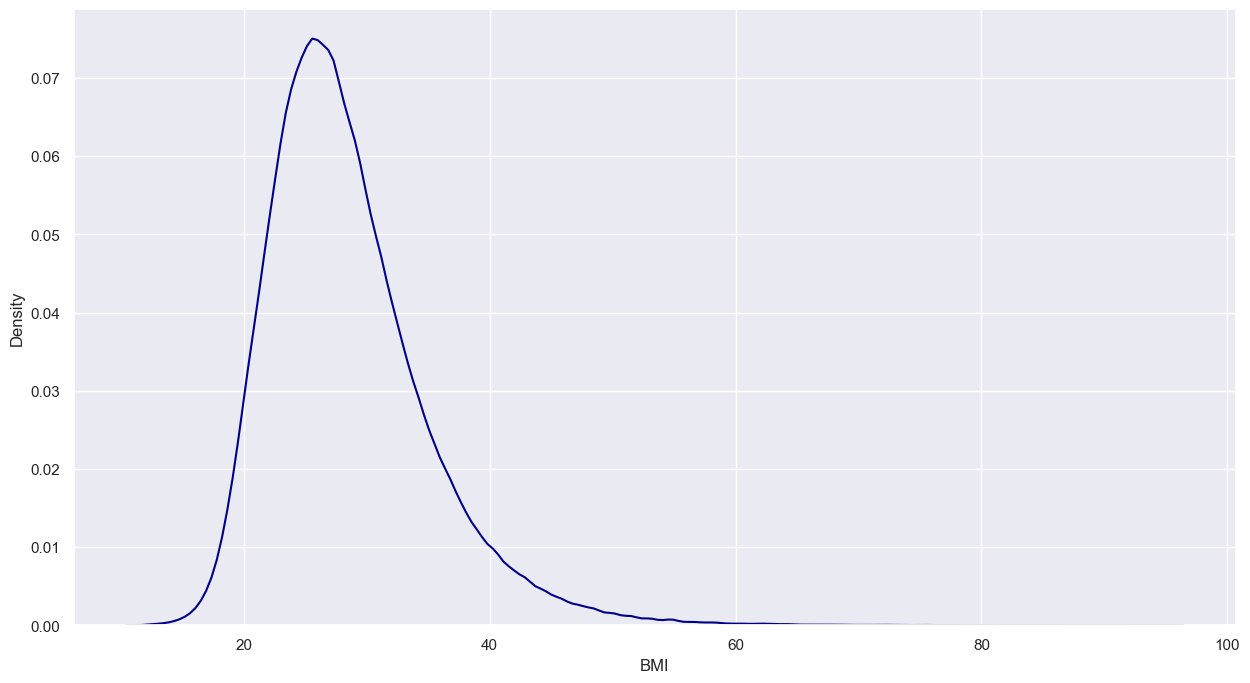

In [45]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.distplot(a=df_heart['BMI'],hist=False, color=colours[4], )
plt.show()

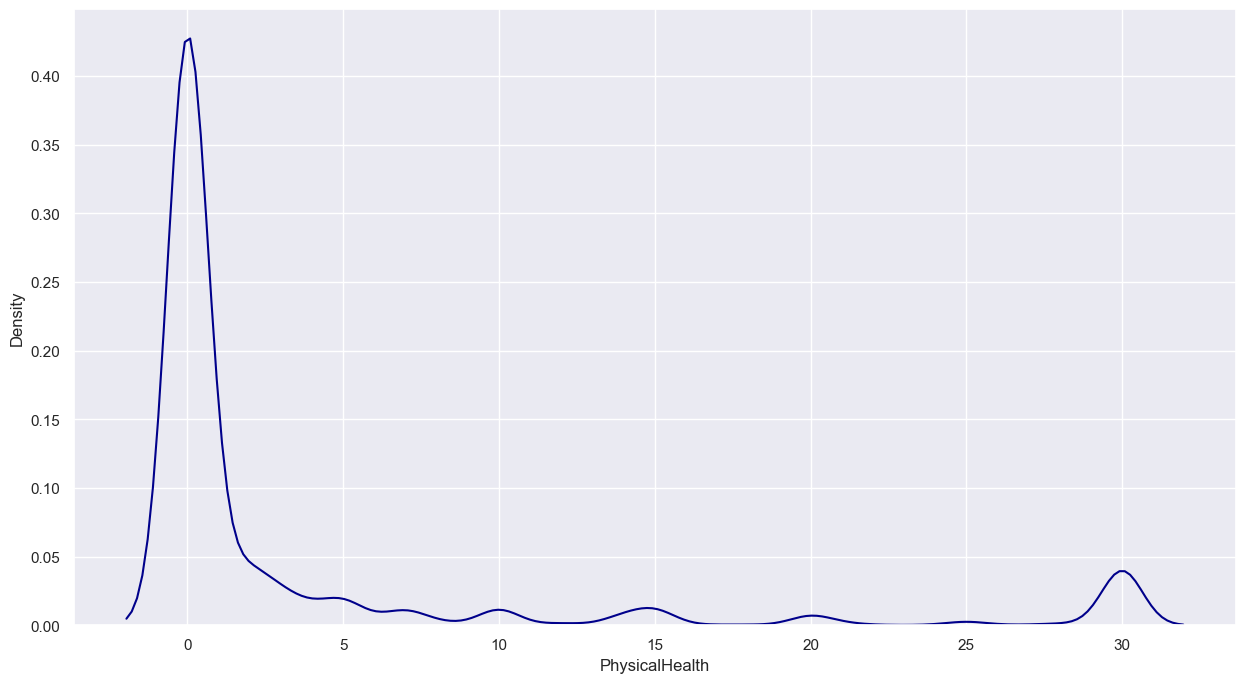

In [46]:
sns.distplot(a=df_heart['PhysicalHealth'],hist=False, color =colours[4])
plt.show()

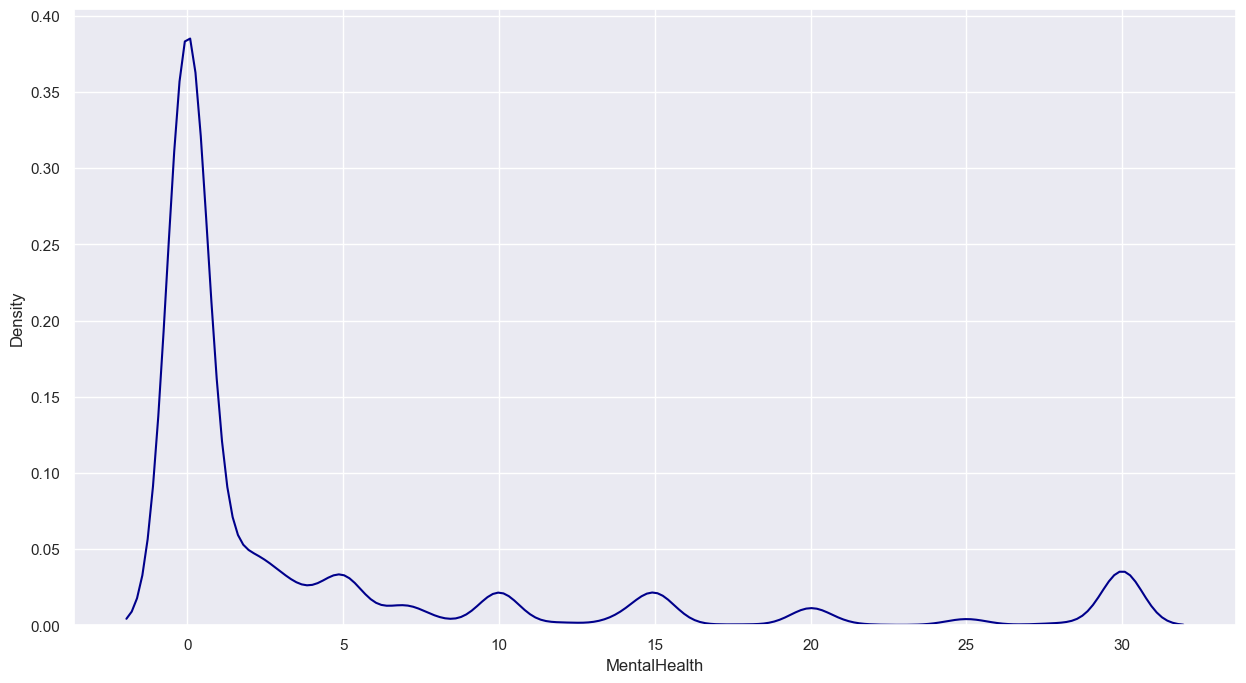

In [47]:
sns.distplot(a=df_heart['MentalHealth'],hist=False, color = colours[4])
plt.show()

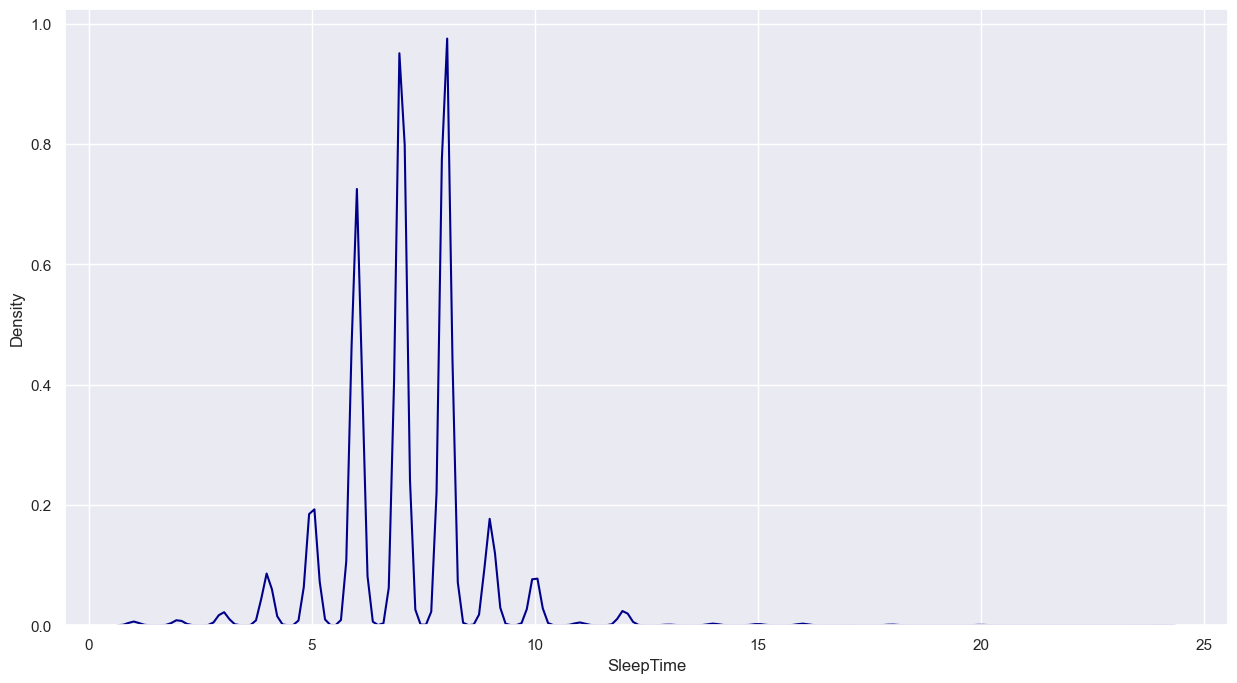

In [48]:
sns.distplot(a=df_heart['SleepTime'],hist=False, color = colours[4])
plt.show()

### <font color = 'royalblue'>2.9 <span style='color:#0386f7de'>|</span> Detecting Outliers <a id="prep_null"></a></font>


In [49]:
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [50]:
sns.set(rc = {'figure.figsize':(6,5)})

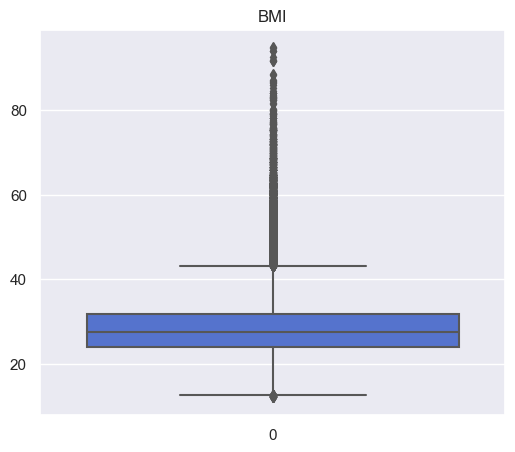

In [51]:
sns.boxplot(data=df_heart['BMI'], color = colours[1])
plt.title('BMI')
plt.show()

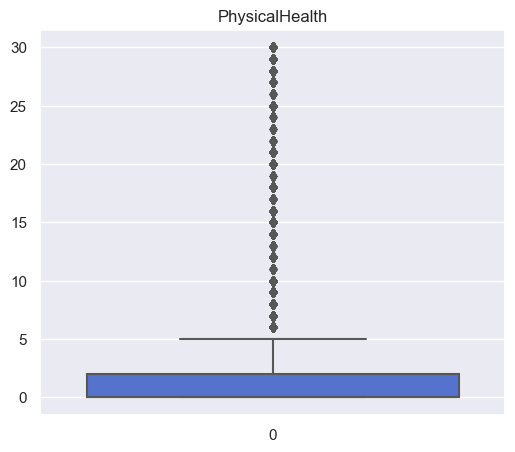

In [52]:
sns.boxplot(data=df_heart['PhysicalHealth'], color = colours[1])
plt.title('PhysicalHealth')
plt.show()

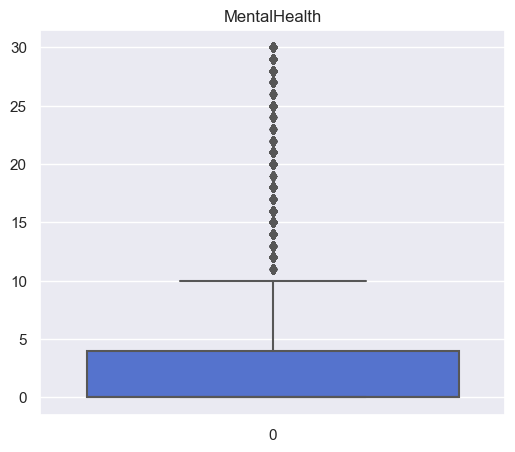

In [53]:
sns.boxplot(data=df_heart['MentalHealth'], color = colours[1])
plt.title('MentalHealth')
plt.show()

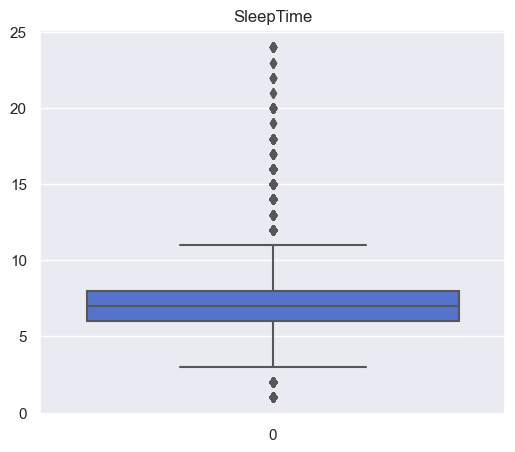

In [54]:
sns.boxplot(data=df_heart['SleepTime'], color = colours[1])
plt.title('SleepTime')
plt.show()

In [55]:
def finding_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return outliers

In [56]:
def finding_outliers(data):
    numeric_data = data.select_dtypes(include='number')
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define a boolean mask for outliers
    outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

    return outliers

# Apply the function to your heart dataset
outliers = finding_outliers(df_heart)
print(outliers)


          BMI  PhysicalHealth  MentalHealth  SleepTime
0       False           False          True      False
1       False           False         False      False
2       False            True          True      False
3       False           False         False      False
4       False            True         False      False
...       ...             ...           ...        ...
319790  False            True         False      False
319791  False           False         False      False
319792  False           False         False      False
319793  False           False         False       True
319794   True           False         False      False

[301717 rows x 4 columns]


In [57]:
def drop_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    not_outliers = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    outliers_droped = not_outliers.dropna().reset_index()
    return outliers_droped
    

In [58]:
def drop_outliers(data):
    numeric_data = data.select_dtypes(include='number')
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define a boolean mask for outliers
    outliers_mask = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))

    # Use the mask to filter outliers
    data_no_outliers = data[~outliers_mask.any(axis=1)]

    return data_no_outliers

# Apply the function to your heart dataset
without_outlier_data = drop_outliers(df_heart)
without_outlier_data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319786,Yes,33.20,Yes,No,No,0.0,0.0,No,Female,60-64,Hispanic,Yes,Yes,Very good,8.0,Yes,No,No
319788,No,23.38,No,No,No,0.0,0.0,No,Female,60-64,Hispanic,No,Yes,Excellent,6.0,No,No,No
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No


In [59]:
without_outlier_data = drop_outliers(df_heart).reset_index(drop=True)

In [60]:
without_outlier_data.to_csv('Heart_Disease_data_without_outliers.csv')

In [61]:
301717 -222531

79186

<font color= 'indigo'><b>INSIGHTS :</b></font>

- If we drop **outliers** then we will miss 79186 observations that means we are droping 25% of our data so we cant drop those many observations also if we drop outliers we will miss the major information about person **BMI** so we will work with data with outliers.

### <font color = 'royalblue'>2.10 <span style='color:#0386f7de'>|</span> Checking For Imbalance in Data Set <a id="prep_null"></a></font>

In [62]:
df_heart.shape

(301717, 18)

In [63]:
pd.value_counts(df_heart['HeartDisease'])

HeartDisease
No     274456
Yes     27261
Name: count, dtype: int64

In [64]:
le = LabelEncoder()
df_heart['HeartDisease'] = le.fit_transform(df_heart['HeartDisease'])

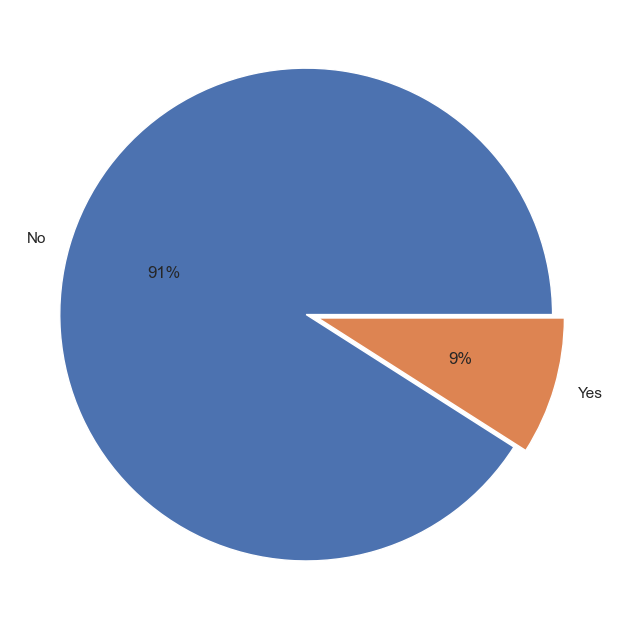

In [65]:
plt.figure(figsize=(10,8))
plt.pie(x=df_heart['HeartDisease'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['No','Yes'])
plt.show()

<font color='indigo'><b>INSIGHTS :</b></font>
- Here we have 274456 observations who dont have Heart disease and only 27261 observations have Heart disease so ita a highly imbalenced data with a proportion of 10:1
- So, to over come this issue we will be useing sampling to balance our data.

### <font color = 'royalblue'>2.10.1 <span style='color:#0386f7de'>|</span> Using Over Sampling <a id="prep_null"></a></font>

In [66]:
class_count_yes,class_count_no = df_heart['HeartDisease'].value_counts()
class_yes  = df_heart[df_heart['HeartDisease']==1]
class_no   = df_heart[df_heart['HeartDisease']==0]
print('Class Yes :',class_yes.shape)
print('Class No  :',class_no.shape)

Class Yes : (27261, 18)
Class No  : (274456, 18)


In [67]:
class_yes_over = class_yes.sample(n=274456,random_state=15,replace=True)
final_data = pd.concat([class_yes_over,class_no],axis=0)

In [68]:
final_data.shape

(548912, 18)

In [69]:
final_data.value_counts(final_data['HeartDisease'])

HeartDisease
0    274456
1    274456
Name: count, dtype: int64

In [70]:
final_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
89800,1,35.31,No,No,No,14.0,0.0,No,Male,70-74,White,No,Yes,Very good,9.0,No,No,Yes
235744,1,24.33,Yes,No,No,0.0,0.0,No,Male,75-79,White,Yes,Yes,Very good,10.0,No,No,No
94264,1,30.79,Yes,No,No,4.0,30.0,Yes,Male,55-59,White,No,Yes,Good,6.0,No,No,No
31764,1,34.44,Yes,No,No,0.0,0.0,No,Male,60-64,White,Yes,Yes,Good,8.0,No,No,No
189719,1,29.65,Yes,No,No,0.0,0.0,No,Male,55-59,White,"No, borderline diabetes",Yes,Good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [71]:
final_data.to_csv('cleaned_heart_disease.csv')

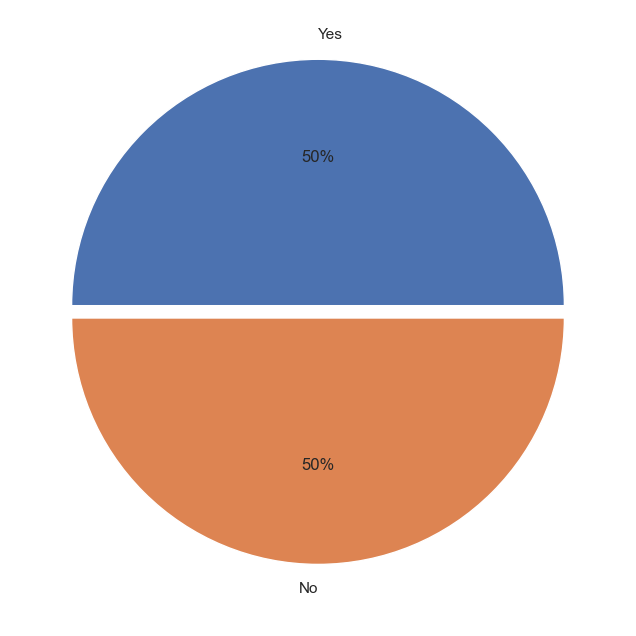

In [72]:
plt.figure(figsize=(10,8))
plt.pie(x=final_data['HeartDisease'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

<font color='indigo'><b>INSIGHTS :</b></font>
- After sampling we can see the data is equally samplled with both of 50%.

### <font color = 'royalblue'>2.11 <span style='color:#0386f7de'>|</span> Correlation Between The Features And Feature Importance<a id="prep_null"></a></font>

### <font color = 'royalblue'>2.11.1 <span style='color:#0386f7de'>|</span> Encoding The Object Features<a id="prep_null"></a></font>

In [73]:
non_numeric_data = final_data.select_dtypes('object')
non_numeric_data = non_numeric_data.columns.values
for col in non_numeric_data:
    final_data[col] = LabelEncoder().fit_transform(final_data[col])

In [74]:
final_data.dtypes

HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory           int32
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object

In [75]:
X = final_data.drop(columns='HeartDisease')
y = final_data[['HeartDisease']]

In [76]:
X.shape,y.shape

((548912, 17), (548912, 1))

In [77]:
X_scaled = StandardScaler()
X_scaled = X_scaled.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.983221,-0.992399,-0.248702,-0.323841,0.849362,-0.505848,-0.571342,0.952712,0.668713,0.470376,-0.571457,0.644088,1.316353,1.172006,-0.434731,-0.291385,2.524910
1,-0.696216,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,0.963659,0.470376,1.763659,0.644088,1.316353,1.790479,-0.434731,-0.291385,-0.396054
2,0.291868,1.007659,-0.248702,-0.323841,-0.148675,2.972204,1.750265,0.952712,-0.216125,0.470376,-0.571457,0.644088,-0.143434,-0.683415,-0.434731,-0.291385,-0.396054
3,0.850151,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,0.078821,0.470376,1.763659,0.644088,-0.143434,0.553532,-0.434731,-0.291385,-0.396054
4,0.117501,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,-0.216125,0.470376,0.596101,0.644088,-0.143434,-0.064941,-0.434731,-0.291385,-0.396054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,-1.018949,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-2.280745,-1.213574,-0.571457,0.644088,-1.603222,0.553532,-0.434731,-0.291385,-0.396054
548908,0.146562,1.007659,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,0.952712,-1.395908,-1.213574,-0.571457,0.644088,1.316353,-1.301888,2.300273,-0.291385,-0.396054
548909,-0.709982,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-0.806016,-1.213574,-0.571457,0.644088,-0.143434,-0.683415,-0.434731,-0.291385,-0.396054
548910,0.600836,-0.992399,-0.248702,-0.323841,-0.547890,-0.505848,-0.571342,-1.049635,-1.985799,-1.213574,-0.571457,-1.552583,-0.143434,3.027426,-0.434731,-0.291385,-0.396054


### <font color = 'royalblue'>2.11.1 <span style='color:#0386f7de'>|</span> Checking Correlation Between Input Features<a id="prep_null"></a></font>

In [78]:
corr_matrix = X_scaled.corr()
corr_matrix

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
BMI,1.000000,0.010807,-0.036629,0.018309,0.115981,0.064485,0.193465,0.024533,-0.032044,-0.033015,0.226998,-0.154230,-0.002648,-0.045275,0.104138,0.069324,-0.039570
Smoking,0.010807,1.000000,0.086496,0.072360,0.125047,0.079003,0.129124,0.111410,0.128528,0.069721,0.068269,-0.101718,-0.004715,-0.019026,0.028789,0.032843,0.028666
AlcoholDrinking,-0.036629,0.086496,1.000000,-0.026801,-0.028720,0.042001,-0.048030,0.001435,-0.086096,0.031269,-0.072421,0.020454,0.004909,-0.001416,-0.008835,-0.039829,-0.013049
Stroke,0.018309,0.072360,-0.026801,1.000000,0.168972,0.071709,0.202147,0.000573,0.143093,-0.022078,0.122976,-0.102348,-0.027255,0.010088,0.057889,0.108779,0.046323
PhysicalHealth,0.115981,0.125047,-0.028720,0.168972,1.000000,0.316311,0.450294,-0.041839,0.116187,0.002898,0.176989,-0.267673,-0.035747,-0.070309,0.134828,0.175077,0.037976
MentalHealth,0.064485,0.079003,0.042001,0.071709,0.316311,1.000000,0.183654,-0.112307,-0.150686,-0.029838,0.045294,-0.116217,-0.013204,-0.120818,0.118905,0.054292,-0.035767
DiffWalking,0.193465,0.129124,-0.048030,0.202147,0.450294,0.183654,1.000000,-0.077985,0.246551,-0.015057,0.229825,-0.318583,-0.060724,-0.032492,0.132067,0.185334,0.062582
Sex,0.024533,0.111410,0.001435,0.000573,-0.041839,-0.112307,-0.077985,1.000000,0.008104,0.049830,0.018332,0.062998,0.002510,0.006975,-0.088751,-0.010725,0.058787
AgeCategory,-0.032044,0.128528,-0.086096,0.143093,0.116187,-0.150686,0.246551,0.008104,1.000000,0.179710,0.196317,-0.135919,0.025250,0.118753,-0.055354,0.138683,0.264601
Race,-0.033015,0.069721,0.031269,-0.022078,0.002898,-0.029838,-0.015057,0.049830,0.179710,1.000000,-0.040713,0.034977,0.050652,0.039882,-0.033537,0.007298,0.151490


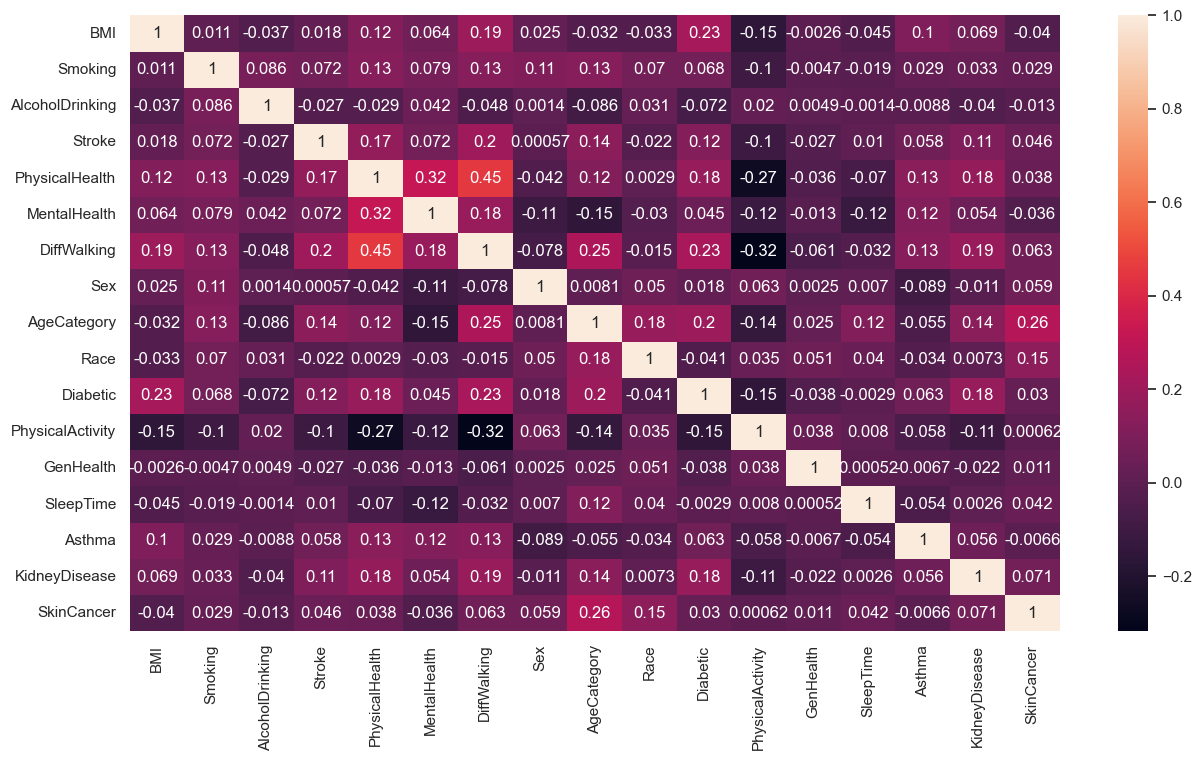

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

<font color='indigo'><b>INSIGHTS :</b></font>

- There is no multicoliniarity between the input features

## <font color = 'darkblue'>3<span style='color:#0386f7de'> | </span>Dividing the dataset for training and testing<a id="prep_null"></a></font>

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=12,stratify=y)

In [81]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((411684, 17), (137228, 17), (411684, 1), (137228, 1))

### <font color = 'royalblue'>3.1 <span style='color:#0386f7de'>| </span>Checking for Feature importance and Decision Tree Classifier<a id="prep_null"></a></font>

In [82]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
imp_features = dt_model.feature_importances_
imp_features = pd.DataFrame(data={'Features':X_scaled.columns,'DT IMP Features':imp_features})
imp_features

,Features,DT IMP Features
0,BMI,0.291795
1,Smoking,0.017348
2,AlcoholDrinking,0.009632
3,Stroke,0.024446
4,PhysicalHealth,0.056291
5,MentalHealth,0.054208
6,DiffWalking,0.033959
7,Sex,0.024328
8,AgeCategory,0.211891
9,Race,0.030221


In [84]:
imp_features = imp_features.sort_values(by='DT IMP Features',ascending=False)
imp_features

,Features,DT IMP Features
0,BMI,0.291795
8,AgeCategory,0.211891
13,SleepTime,0.082427
12,GenHealth,0.077046
4,PhysicalHealth,0.056291
5,MentalHealth,0.054208
6,DiffWalking,0.033959
9,Race,0.030221
3,Stroke,0.024446
7,Sex,0.024328


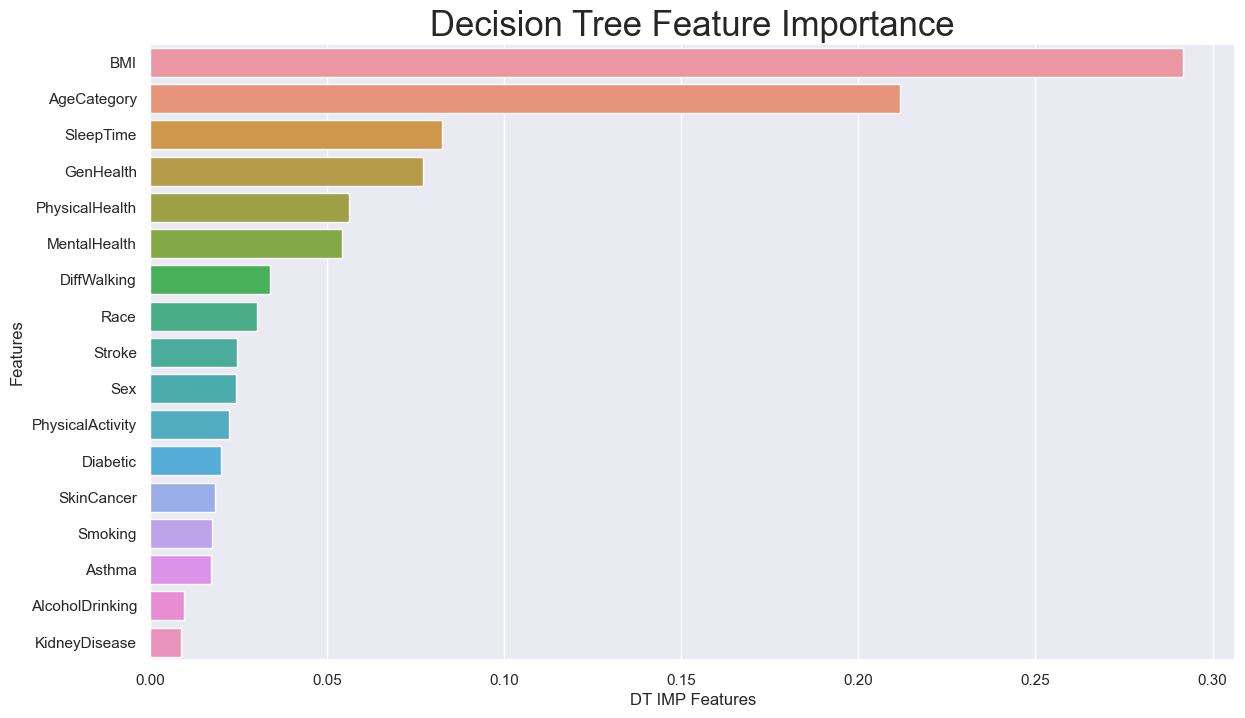

In [85]:
plt.figure(figsize=(14,8))
sns.barplot(x='DT IMP Features',y='Features',data=imp_features)
plt.title('Decision Tree Feature Importance',size=25)
plt.show()

## <font color = 'darkblue'>4<span style='color:#0386f7de'> | </span>Model Selection<a id="prep_null"></a></font>

### <font color = 'royalblue'>4.1<span style='color:#0386f7de'> | </span>Checking for best params using grid_search_cv by using DecisionTreeClassifier<a id="prep_null"></a></font>

In [86]:
grid_search = GridSearchCV(estimator=dt_model,param_grid={'criterion':['gini','entropy'],
                                                          'max_depth':[1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12 , 13 , 14 , 15 , 16 , 17 , 18 , 19 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 27 , 28 , 29 , 30 , 31 , 32 , 33 , 34 , 35 , 36 , 37 , 38 , 39 , 40 , 41 , 42 , 43 , 44 , 45 , 46 , 47 , 48 , 49 , 50 , 51 , 52 , 53 , 54 , 55 , 56 , 57 , 58 , 59 , 60 ]})

In [87]:
%%time
grid_search= grid_search.fit(X_scaled,y)

CPU times: total: 30min 49s
Wall time: 1h 2min 24s


In [88]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 59}

### <font color = 'darkblue'>These are the models we are testing for our prediction</font>

<h3><font color = 'royalblue'> 1. Logistic Regression</font></h3>
<h3><font color = 'royalblue'> 2. Decision Tree Classifier</font></h3>
<h3><font color = 'royalblue'> 3. RandomForest Classifier</font></h3>
<h3><font color = 'royalblue'> 4. AdaBoost Classifier</font></h3>
<h3><font color = 'royalblue'> 5. Gradient Boosting Classifier</font></h3>
<h3><font color = 'royalblue'> 6. XGB Classifier</font></h3>
<h3><font color = 'royalblue'> 7. LGBM Classifier</font></h3>
<h3><font color = 'royalblue'> 8. KNeighbors Classifier</font></h3>
<h3><font color = 'royalblue'> 9. GaussianNB</font></h3>

<h3><font color = 'royalblue'> 1 <span style='color:#0386f7de'> | </span> Logistic Regression</font></h3>

In [89]:
%%time
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

CPU times: total: 406 ms
Wall time: 646 ms


LogisticRegression()

In [90]:
logistic_pred_train = logistic_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train,logistic_pred_train))

Accuracy Score                 : 0.7483
Precision Score                : 0.7399
Recall Score                   : 0.766
Confusion Matrix               :
 [[150414  55428]
 [ 48177 157665]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74    205842
           1       0.74      0.77      0.75    205842

    accuracy                           0.75    411684
   macro avg       0.75      0.75      0.75    411684
weighted avg       0.75      0.75      0.75    411684



In [91]:
logistic_pred_test = logistic_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test,logistic_pred_test))

Accuracy Score                 : 0.7472
Precision Score                : 0.7383
Recall Score                   : 0.7659
Confusion Matrix               :
 [[49987 18627]
 [16063 52551]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.76      0.73      0.74     68614
           1       0.74      0.77      0.75     68614

    accuracy                           0.75    137228
   macro avg       0.75      0.75      0.75    137228
weighted avg       0.75      0.75      0.75    137228



Area Under Curve     : 0.7472090243973533


Text(0, 0.5, 'True Positive Rate')

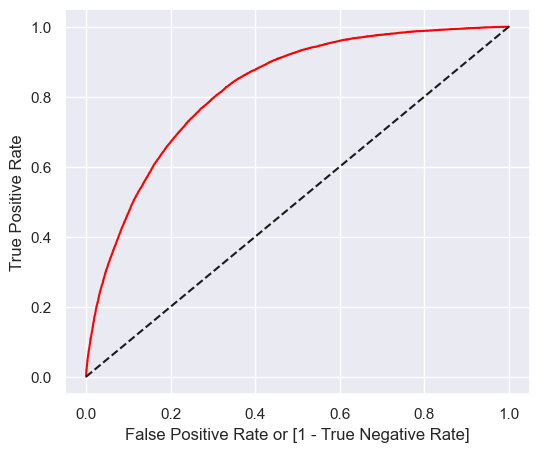

In [92]:
fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, logistic_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'> 2 <span style='color:#0386f7de'> | </span> Decision Tree Classifier </font></h3>

In [93]:
%%time
dt_model = DecisionTreeClassifier(random_state=15,max_depth=57)
dt_model.fit(X_train,y_train)

CPU times: total: 2.27 s
Wall time: 5.09 s


DecisionTreeClassifier(max_depth=57, random_state=15)

In [94]:
dt_pred_train = dt_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train,dt_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9958
Recall Score                   : 1.0
Confusion Matrix               :
 [[204975    867]
 [     5 205837]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205842
           1       1.00      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [95]:
dt_pred_test = dt_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test,dt_pred_test))

Accuracy Score                 : 0.9501
Precision Score                : 0.9099
Recall Score                   : 0.999
Confusion Matrix               :
 [[61827  6787]
 [   66 68548]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     68614
           1       0.91      1.00      0.95     68614

    accuracy                           0.95    137228
   macro avg       0.95      0.95      0.95    137228
weighted avg       0.95      0.95      0.95    137228



Area Under Curve     : 0.9500612119975516


Text(0, 0.5, 'True Positive Rate')

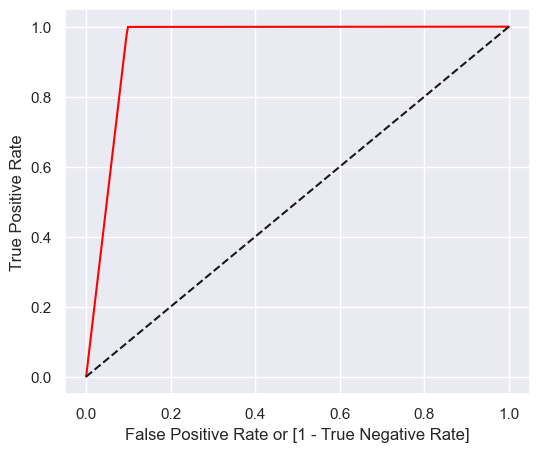

In [96]:
fpr, tpr, thresholds = roc_curve(y_test,dt_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, dt_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'> 3 <span style='color:#0386f7de'> | </span> Random Forest Classifier</font></h3>

In [97]:
%%time
rf_model = RandomForestClassifier(random_state=15,max_depth=57)
rf_model.fit(X_train,y_train)

CPU times: total: 1min 19s
Wall time: 2min 3s


RandomForestClassifier(max_depth=57, random_state=15)

In [98]:
rf_pred_train = rf_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,rf_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,rf_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,rf_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,rf_pred_train))
print('Classification Report          :\n',classification_report(y_train,rf_pred_train))

Accuracy Score                 : 0.9979
Precision Score                : 0.9958
Recall Score                   : 1.0
Confusion Matrix               :
 [[204981    861]
 [     3 205839]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    205842
           1       1.00      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [99]:
rf_pred_test = rf_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,rf_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,rf_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,rf_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,rf_pred_test))
print('Classification Report          :\n',classification_report(y_test,rf_pred_test))

Accuracy Score                 : 0.9656
Precision Score                : 0.9363
Recall Score                   : 0.9991
Confusion Matrix               :
 [[63948  4666]
 [   61 68553]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     68614
           1       0.94      1.00      0.97     68614

    accuracy                           0.97    137228
   macro avg       0.97      0.97      0.97    137228
weighted avg       0.97      0.97      0.97    137228



Area Under Curve     : 0.9655536770921387


Text(0, 0.5, 'True Positive Rate')

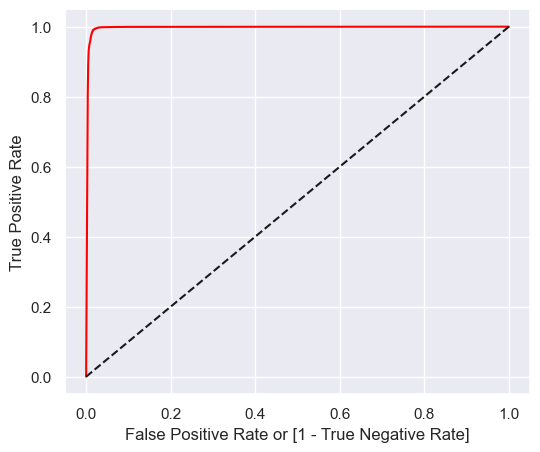

In [100]:
fpr, tpr, thresholds = roc_curve(y_test,rf_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, rf_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'> 4 <span style='color:#0386f7de'> | </span> Ada Boost Classifier</font></h3>

In [101]:
%%time
adaboost_model = AdaBoostClassifier(random_state=15)
adaboost_model.fit(X_train,y_train)

CPU times: total: 15.7 s
Wall time: 24.9 s


AdaBoostClassifier(random_state=15)

In [102]:
adaboost_pred_train = adaboost_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,adaboost_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,adaboost_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,adaboost_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,adaboost_pred_train))
print('Classification Report          :\n',classification_report(y_train,adaboost_pred_train))

Accuracy Score                 : 0.7587
Precision Score                : 0.7504
Recall Score                   : 0.7753
Confusion Matrix               :
 [[152762  53080]
 [ 46252 159590]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75    205842
           1       0.75      0.78      0.76    205842

    accuracy                           0.76    411684
   macro avg       0.76      0.76      0.76    411684
weighted avg       0.76      0.76      0.76    411684



In [103]:
adaboost_pred_test = adaboost_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,adaboost_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,adaboost_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,adaboost_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,adaboost_pred_test))
print('Classification Report          :\n',classification_report(y_test,adaboost_pred_test))

Accuracy Score                 : 0.7565
Precision Score                : 0.748
Recall Score                   : 0.7738
Confusion Matrix               :
 [[50723 17891]
 [15519 53095]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.77      0.74      0.75     68614
           1       0.75      0.77      0.76     68614

    accuracy                           0.76    137228
   macro avg       0.76      0.76      0.76    137228
weighted avg       0.76      0.76      0.76    137228



Area Under Curve     : 0.7565365668813944


Text(0, 0.5, 'True Positive Rate')

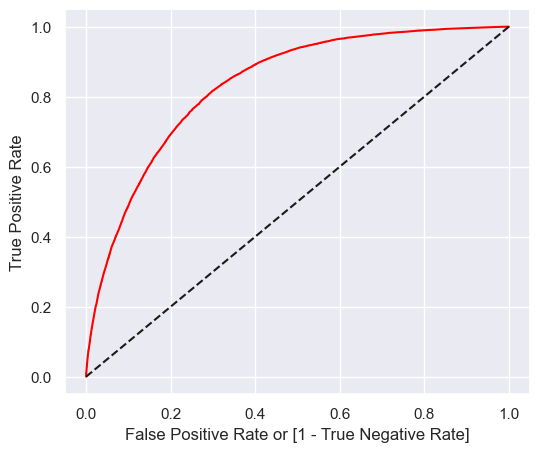

In [104]:
fpr, tpr, thresholds = roc_curve(y_test,adaboost_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, adaboost_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'> 5 <span style='color:#0386f7de'> | </span> Gradient Boost Classifier</font></h3>

In [105]:
%%time
gradient_model = GradientBoostingClassifier(random_state=15)
gradient_model.fit(X_train,y_train)

CPU times: total: 57.6 s
Wall time: 1min 23s


GradientBoostingClassifier(random_state=15)

In [106]:
gradient_pred_train = gradient_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,gradient_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,gradient_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,gradient_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,gradient_pred_train))
print('Classification Report          :\n',classification_report(y_train,gradient_pred_train))

Accuracy Score                 : 0.7631
Precision Score                : 0.7447
Recall Score                   : 0.8008
Confusion Matrix               :
 [[149326  56516]
 [ 40994 164848]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.78      0.73      0.75    205842
           1       0.74      0.80      0.77    205842

    accuracy                           0.76    411684
   macro avg       0.76      0.76      0.76    411684
weighted avg       0.76      0.76      0.76    411684



In [107]:
gradient_pred_test = gradient_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,gradient_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,gradient_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,gradient_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,gradient_pred_test))
print('Classification Report          :\n',classification_report(y_test,gradient_pred_test))

Accuracy Score                 : 0.7611
Precision Score                : 0.7422
Recall Score                   : 0.8002
Confusion Matrix               :
 [[49547 19067]
 [13711 54903]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.78      0.72      0.75     68614
           1       0.74      0.80      0.77     68614

    accuracy                           0.76    137228
   macro avg       0.76      0.76      0.76    137228
weighted avg       0.76      0.76      0.76    137228



Area Under Curve     : 0.7611420409828897


Text(0, 0.5, 'True Positive Rate')

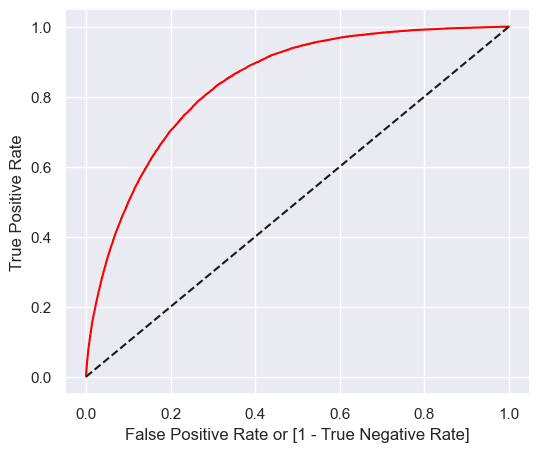

In [108]:
fpr, tpr, thresholds = roc_curve(y_test,gradient_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, gradient_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'> 6 <span style='color:#0386f7de'> | </span> XGBoost Classifier</font></h3>

In [109]:
%%time
xgb_model = XGBClassifier(max_depth=57,random_state=15)
xgb_model.fit(X_train,y_train)

CPU times: total: 1min 17s
Wall time: 52 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=57, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=15, ...)

In [110]:
xgb_pred_train = xgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,xgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,xgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,xgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,xgb_pred_train))
print('Classification Report          :\n',classification_report(y_train,xgb_pred_train))

Accuracy Score                 : 0.9965
Precision Score                : 0.9931
Recall Score                   : 0.9999
Confusion Matrix               :
 [[204417   1425]
 [    11 205831]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    205842
           1       0.99      1.00      1.00    205842

    accuracy                           1.00    411684
   macro avg       1.00      1.00      1.00    411684
weighted avg       1.00      1.00      1.00    411684



In [111]:
xgb_pred_test = xgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,xgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,xgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,xgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,xgb_pred_test))
print('Classification Report          :\n',classification_report(y_test,xgb_pred_test))

Accuracy Score                 : 0.9624
Precision Score                : 0.9307
Recall Score                   : 0.9991
Confusion Matrix               :
 [[63513  5101]
 [   63 68551]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     68614
           1       0.93      1.00      0.96     68614

    accuracy                           0.96    137228
   macro avg       0.96      0.96      0.96    137228
weighted avg       0.96      0.96      0.96    137228



Area Under Curve     : 0.9623691957909465


Text(0, 0.5, 'True Positive Rate')

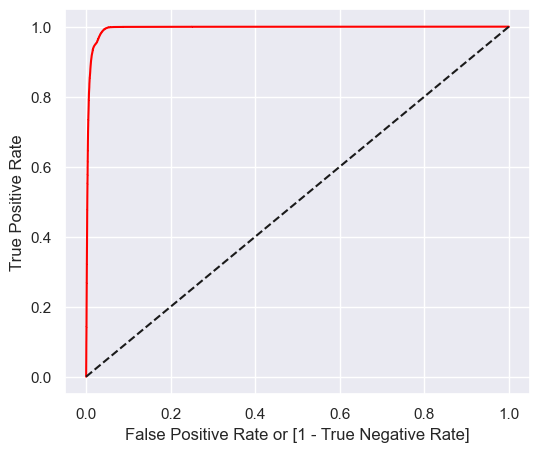

In [112]:
fpr, tpr, thresholds = roc_curve(y_test,xgb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, xgb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'>7 <span style='color:#0386f7de'> | </span> Light GBM Classifier</font></h3>

In [113]:
%%time
lgb_model      = LGBMClassifier(max_depth=57,random_state=15)
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 205842, number of negative: 205842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 401
[LightGBM] [Info] Number of data points in the train set: 411684, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
CPU times: total: 8.78 s
Wall time: 6.23 s


LGBMClassifier(max_depth=57, random_state=15)

In [114]:
lgb_pred_train = lgb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,lgb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,lgb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,lgb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,lgb_pred_train))
print('Classification Report          :\n',classification_report(y_train,lgb_pred_train))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy Score                 : 0.7695
Precision Score                : 0.7428
Recall Score                   : 0.8247
Confusion Matrix               :
 [[147050  58792]
 [ 36081 169761]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.71      0.76    205842
           1       0.74      0.82      0.78    205842

    accuracy                           0.77    411684
   macro avg       0.77      0.77      0.77    411684
weighted avg       0.77      0.77      0.77    411684



In [115]:
lgb_pred_test = lgb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,lgb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,lgb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,lgb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,lgb_pred_test))
print('Classification Report          :\n',classification_report(y_test,lgb_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy Score                 : 0.7668
Precision Score                : 0.7399
Recall Score                   : 0.823
Confusion Matrix               :
 [[48765 19849]
 [12147 56467]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.71      0.75     68614
           1       0.74      0.82      0.78     68614

    accuracy                           0.77    137228
   macro avg       0.77      0.77      0.77    137228
weighted avg       0.77      0.77      0.77    137228



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Area Under Curve     : 0.7668405864692337


Text(0, 0.5, 'True Positive Rate')

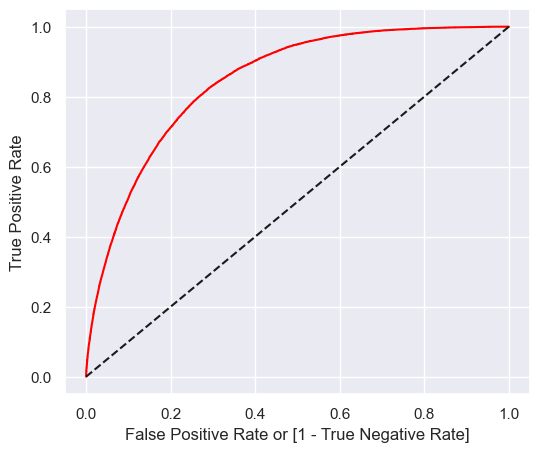

In [116]:
fpr, tpr, thresholds = roc_curve(y_test,lgb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, lgb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'>8 <span style='color:#0386f7de'> | </span> K-Nearest Neighbours Classifier</font></h3>

In [117]:
%%time
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

CPU times: total: 78.1 ms
Wall time: 113 ms


KNeighborsClassifier()

In [118]:
knn_pred_train = knn_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,knn_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,knn_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,knn_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,knn_pred_train))
print('Classification Report          :\n',classification_report(y_train,knn_pred_train))

Accuracy Score                 : 0.9157
Precision Score                : 0.8569
Recall Score                   : 0.9981
Confusion Matrix               :
 [[171523  34319]
 [   396 205446]]
Classification Report          :
               precision    recall  f1-score   support

           0       1.00      0.83      0.91    205842
           1       0.86      1.00      0.92    205842

    accuracy                           0.92    411684
   macro avg       0.93      0.92      0.92    411684
weighted avg       0.93      0.92      0.92    411684



In [119]:
knn_pred_test = knn_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,knn_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,knn_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,knn_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,knn_pred_test))
print('Classification Report          :\n',classification_report(y_test,knn_pred_test))

Accuracy Score                 : 0.8833
Precision Score                : 0.8147
Recall Score                   : 0.9922
Confusion Matrix               :
 [[53131 15483]
 [  534 68080]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.77      0.87     68614
           1       0.81      0.99      0.89     68614

    accuracy                           0.88    137228
   macro avg       0.90      0.88      0.88    137228
weighted avg       0.90      0.88      0.88    137228



Area Under Curve     : 0.8832818375258693


Text(0, 0.5, 'True Positive Rate')

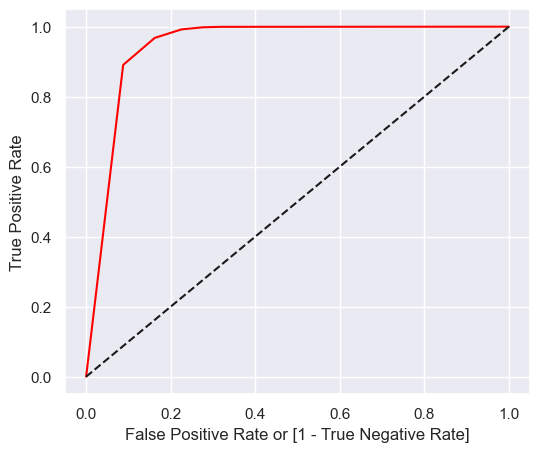

In [120]:
fpr, tpr, thresholds = roc_curve(y_test,knn_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, knn_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

<h3><font color = 'royalblue'>9 <span style='color:#0386f7de'> | </span>Gaussian NB</font></h3>

In [121]:
%%time
gauss_nb_model = GaussianNB()
gauss_nb_model.fit(X_train,y_train)

CPU times: total: 266 ms
Wall time: 419 ms


GaussianNB()

In [122]:
gauss_nb_pred_train = gauss_nb_model.predict(X_train)
print('Accuracy Score                 :',round(accuracy_score(y_train,gauss_nb_pred_train),4))
print('Precision Score                :',round(precision_score(y_train,gauss_nb_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train,gauss_nb_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train,gauss_nb_pred_train))
print('Classification Report          :\n',classification_report(y_train,gauss_nb_pred_train))

Accuracy Score                 : 0.7027
Precision Score                : 0.7559
Recall Score                   : 0.5987
Confusion Matrix               :
 [[166048  39794]
 [ 82600 123242]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.67      0.81      0.73    205842
           1       0.76      0.60      0.67    205842

    accuracy                           0.70    411684
   macro avg       0.71      0.70      0.70    411684
weighted avg       0.71      0.70      0.70    411684



In [123]:
gauss_nb_pred_test = gauss_nb_model.predict(X_test)
print('Accuracy Score                 :',round(accuracy_score(y_test,gauss_nb_pred_test),4))
print('Precision Score                :',round(precision_score(y_test,gauss_nb_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test,gauss_nb_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test,gauss_nb_pred_test))
print('Classification Report          :\n',classification_report(y_test,gauss_nb_pred_test))

Accuracy Score                 : 0.7031
Precision Score                : 0.7557
Recall Score                   : 0.6002
Confusion Matrix               :
 [[55304 13310]
 [27435 41179]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.67      0.81      0.73     68614
           1       0.76      0.60      0.67     68614

    accuracy                           0.70    137228
   macro avg       0.71      0.70      0.70    137228
weighted avg       0.71      0.70      0.70    137228



Area Under Curve     : 0.7030853761622993


Text(0, 0.5, 'True Positive Rate')

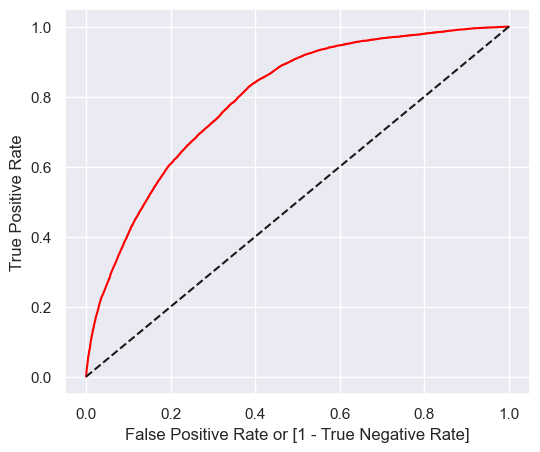

In [124]:
fpr, tpr, thresholds = roc_curve(y_test,gauss_nb_model.predict_proba (X_test)[:,1])
auc_score = roc_auc_score(y_test, gauss_nb_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [125]:
resultdata =[['Logistic Regression',0.7483,0.7472,0.7383,0.7659,0.7472],
            ['Decision Tree',0.9979,0.9500,0.9098,0.9990,0.9500],
            ['Random Forest',0.9979,0.9656,0.9363,0.9991,0.9655],
            ['Addaboost',0.7587,0.7565,0.7480,0.7738,0.7565],
            ['Gradient Boosting',0.7631,0.7611,0.7422,0.8002,0.7611],
            ['Extreme Gradient Boosting',0.9979,0.9634,0.9326,0.9991,0.9634,],
            ['Light Gradient Boosting',0.7695,0.7668,0.7399,0.8230,0.7668],
            ['K-Nearest Neighbor',0.9178,0.8887,0.8218,0.9932,0.8887],
            ['GaussianNB',0.7027,0.7031,0.7557,0.6002,0.7030]
            ] 

result_df = pd.DataFrame(resultdata,columns=['Models','Training Accuracy','Test Accuracy','Precision Score','Recall Score','AUC Score'])
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score,AUC Score
0,Logistic Regression,0.7483,0.7472,0.7383,0.7659,0.7472
1,Decision Tree,0.9979,0.9500,0.9098,0.9990,0.9500
2,Random Forest,0.9979,0.9656,0.9363,0.9991,0.9655
3,Addaboost,0.7587,0.7565,0.7480,0.7738,0.7565
4,Gradient Boosting,0.7631,0.7611,0.7422,0.8002,0.7611
5,Extreme Gradient Boosting,0.9979,0.9634,0.9326,0.9991,0.9634
6,Light Gradient Boosting,0.7695,0.7668,0.7399,0.8230,0.7668
7,K-Nearest Neighbor,0.9178,0.8887,0.8218,0.9932,0.8887
8,GaussianNB,0.7027,0.7031,0.7557,0.6002,0.7030


In [126]:
result_df = result_df.sort_values(by='Test Accuracy',ascending=False)
result_df

,Models,Training Accuracy,Test Accuracy,Precision Score,Recall Score,AUC Score
2,Random Forest,0.9979,0.9656,0.9363,0.9991,0.9655
5,Extreme Gradient Boosting,0.9979,0.9634,0.9326,0.9991,0.9634
1,Decision Tree,0.9979,0.9500,0.9098,0.9990,0.9500
7,K-Nearest Neighbor,0.9178,0.8887,0.8218,0.9932,0.8887
6,Light Gradient Boosting,0.7695,0.7668,0.7399,0.8230,0.7668
4,Gradient Boosting,0.7631,0.7611,0.7422,0.8002,0.7611
3,Addaboost,0.7587,0.7565,0.7480,0.7738,0.7565
0,Logistic Regression,0.7483,0.7472,0.7383,0.7659,0.7472
8,GaussianNB,0.7027,0.7031,0.7557,0.6002,0.7030


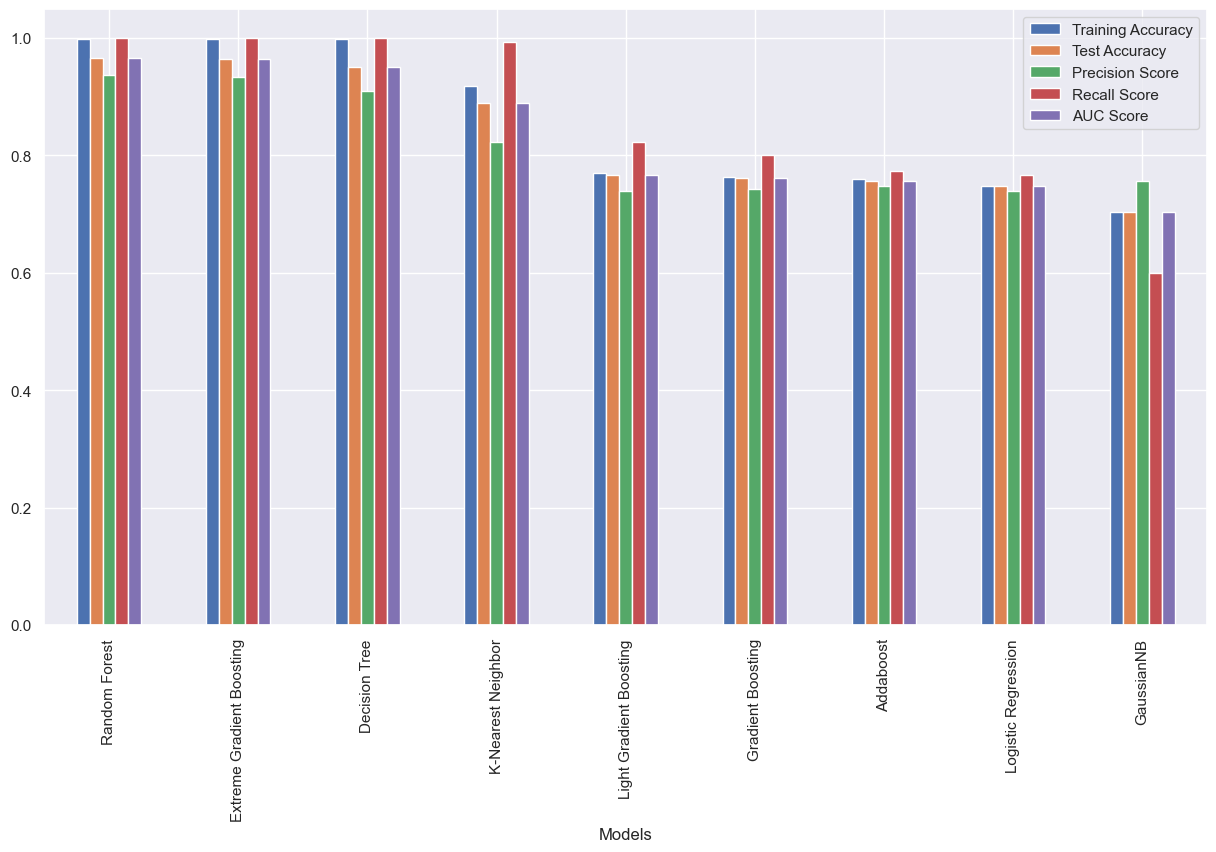

In [127]:
result_df.plot(x="Models", y=['Training Accuracy','Test Accuracy','Precision Score','Recall Score','AUC Score'], kind="bar", figsize =(15,8))
plt.show()

<font color = 'Indigo'><b>INSIGHTS :</b></font>
- From above dataframe its clear that for random forest we got better accuracy as well as precision and recall score.

## <font color = 'darkblue'>5<span style='color:#0386f7de'> | </span>Conclusion<a id="prep_null"></a></font>
- **Input Features                =** 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke','PhysicalHealth', 'MentalHealth',                                             'DiffWalking', 'Sex', 'AgeCategory','Race', 'Diabetic', 'PhysicalActivity',                                                 'GenHealth', 'SleepTime','Asthma', 'KidneyDisease', 'SkinCancer'
<P>
- **Output Feature                =** HeartDisease
<P>
- **Data Set Type                 =**  Balened data set using Oversampling
<P>
- **Best Model                    =** Random Forest
<P>
- **Train Accuracy Score         :** 0.9979	
<P>
- **Test Accuracy Score          :** 0.9656
<P>
- **Classification Report          :**

               precision    recall  f1-score   support
             
           0       1.00      0.93      0.96     68614
           1       0.94      1.00      0.97     68614
